# This is the Machine Learning Script where from the x variables I am going to predict y (predicted) variable......

In [1]:
# Loading the Libraries......
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset to work with it.....
df = pd.read_csv('car_dataset.csv')

In [3]:
# Checking the dataset.....
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
# Checking the shape and the n-dimention form the dataset.....
print(f'The shape of the dataset: {df.shape}')
print(f'The n-dimention of the dataset: {df.ndim}')

The shape of the dataset: (4340, 8)
The n-dimention of the dataset: 2


In [5]:
# Checking the information of the data-set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
# We dont need the name column so we can remove it.....
del df['name']

In [7]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [13]:
# Checking the value_count of 'fuel , seller_type , transmission , Owner'
solo_x = ['fuel', 'seller_type', 'transmission', 'owner']
# df['fuel'].value_counts()
for _ in solo_x:
    print(df[_].value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [14]:
# Doing the label encoding to this dataset.......
solo_encoder = ['fuel', 'seller_type', 'transmission', 'owner']
from sklearn.preprocessing import LabelEncoder
for _ in solo_encoder:
    le = LabelEncoder()
    df[_] = le.fit_transform(df[_])

In [15]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,4,1,1,0
1,2007,135000,50000,4,1,1,0
2,2012,600000,100000,1,1,1,0
3,2017,250000,46000,4,1,1,0
4,2014,450000,141000,1,1,1,2


In [16]:
# Checking the outliers from the dataset
# But first we have to check the description and the other plots......
df.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340.000000,4.340000e+03,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,2013.090783,5.041273e+05,66215.777419,2.469124,0.794470,0.896774,0.820276
std,4.215344,5.785487e+05,46644.102194,1.508435,0.458629,0.304289,1.233494
min,1992.000000,2.000000e+04,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,2.087498e+05,35000.000000,1.000000,1.000000,1.000000,0.000000
50%,2014.000000,3.500000e+05,60000.000000,1.000000,1.000000,1.000000,0.000000
75%,2016.000000,6.000000e+05,90000.000000,4.000000,1.000000,1.000000,2.000000
max,2020.000000,8.900000e+06,806599.000000,4.000000,2.000000,1.000000,4.000000


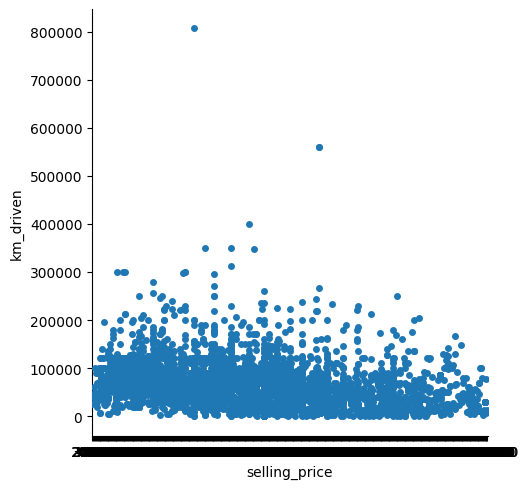

In [18]:
sns.catplot(y = 'km_driven', x = 'selling_price', data = df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

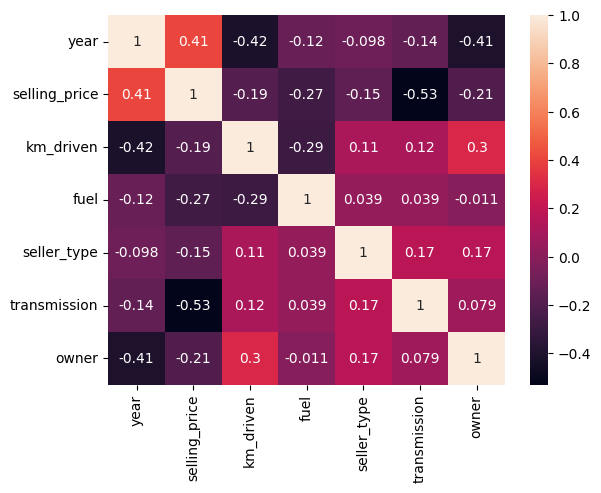

In [19]:
# Heatmap visulization....
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.show

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           4340 non-null   int64
 1   selling_price  4340 non-null   int64
 2   km_driven      4340 non-null   int64
 3   fuel           4340 non-null   int64
 4   seller_type    4340 non-null   int64
 5   transmission   4340 non-null   int64
 6   owner          4340 non-null   int64
dtypes: int64(7)
memory usage: 237.5 KB


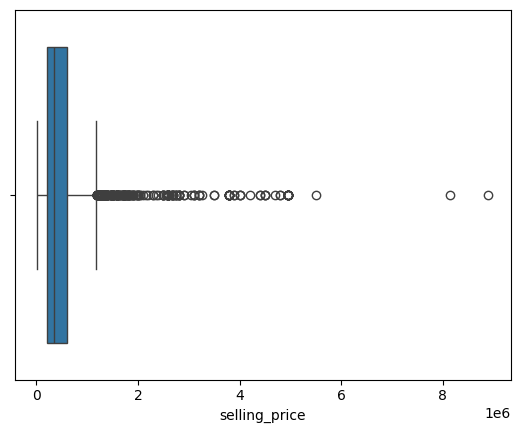

In [22]:
sns.boxplot(x = 'selling_price', data = df)
plt.show()

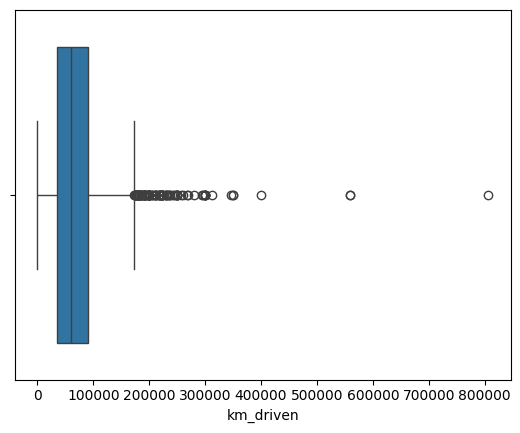

In [23]:
sns.boxplot(x = 'km_driven', data = df)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

x = df.drop('selling_price', axis = 1)
y = df.selling_price

In [25]:
x 

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,4,1,1,0
1,2007,50000,4,1,1,0
2,2012,100000,1,1,1,0
3,2017,46000,4,1,1,0
4,2014,141000,1,1,1,2
...,...,...,...,...,...,...
4335,2014,80000,1,1,1,2
4336,2014,80000,1,1,1,2
4337,2009,83000,4,1,1,2
4338,2016,90000,1,1,1,0


In [26]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, shuffle = True)

In [27]:
# Model fitting and checking the predction and score.....
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
# Checking the prediction of the model.....
y_pred = model.predict(x_test)
y_pred

array([ 4.28311148e+05,  5.33032492e+05,  8.01938587e+04,  4.85673155e+05,
        1.55288754e+06,  2.52722781e+05,  4.24441413e+05,  2.83777523e+05,
        6.65430906e+05,  2.83844021e+05,  6.64454849e+05,  6.08507027e+05,
        5.89814266e+05,  6.49794518e+04,  4.76973117e+05,  4.77171048e+05,
        8.21306731e+05,  1.36226610e+06,  1.15904585e+05,  1.46702632e+06,
        6.72541068e+05,  7.57426228e+05,  4.87462245e+05,  7.78277347e+05,
        3.35158787e+05,  6.45736828e+05,  7.18851658e+05,  2.74092305e+05,
        4.34594105e+05,  5.57011279e+05, -3.30146158e+04,  1.44367958e+06,
        5.74356910e+05,  7.42090103e+05,  5.35117604e+05,  4.71494070e+05,
        7.93915686e+05,  4.97887804e+05,  1.14747545e+05,  5.19781479e+05,
        6.14460149e+05,  4.96323970e+05,  7.30621987e+05,  4.56898286e+05,
        3.99192827e+05,  3.51537468e+05,  4.25513316e+05,  4.69179990e+05,
        7.36575109e+05,  4.72724356e+05,  2.20779846e+05,  3.33330264e+05,
        3.27508787e+05,  

In [30]:
# Checking the score of the model......
print(f'Model score (Train): {model.score(x_train,y_train)}')
print(f'Model score (Test): {model.score(x_test, y_test)}')

Model score (Train): 0.4608851899472245
Model score (Test): 0.393900852934002
